# Porcentaje de victorias en casa-visitante
Ronaldo Rafael Arias Parada-1151674

In [123]:
# impotacion de las librerias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [29]:
dataset = pd.read_csv('results.csv')
df = pd.DataFrame(dataset)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [30]:
df.shape

(43451, 9)

# Analisis exploratorio de datos (EDA)

In [31]:
df.describe()

,home_score,away_score
count,43451.000000,43451.000000
mean,1.741640,1.181008
std,1.751591,1.397774
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43451 entries, 0 to 43450
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43451 non-null  object
 1   home_team   43451 non-null  object
 2   away_team   43451 non-null  object
 3   home_score  43451 non-null  int64 
 4   away_score  43451 non-null  int64 
 5   tournament  43451 non-null  object
 6   city        43451 non-null  object
 7   country     43451 non-null  object
 8   neutral     43451 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [33]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [34]:
#Comprobar si hay valores NaN
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [38]:
#Comprobando si hay filas duplicadas
df[df.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [39]:
# Comprobando si faltan datos
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

date - 0%
home_team - 0%
away_team - 0%
home_score - 0%
away_score - 0%
tournament - 0%
city - 0%
country - 0%
neutral - 0%


DataFrame datos


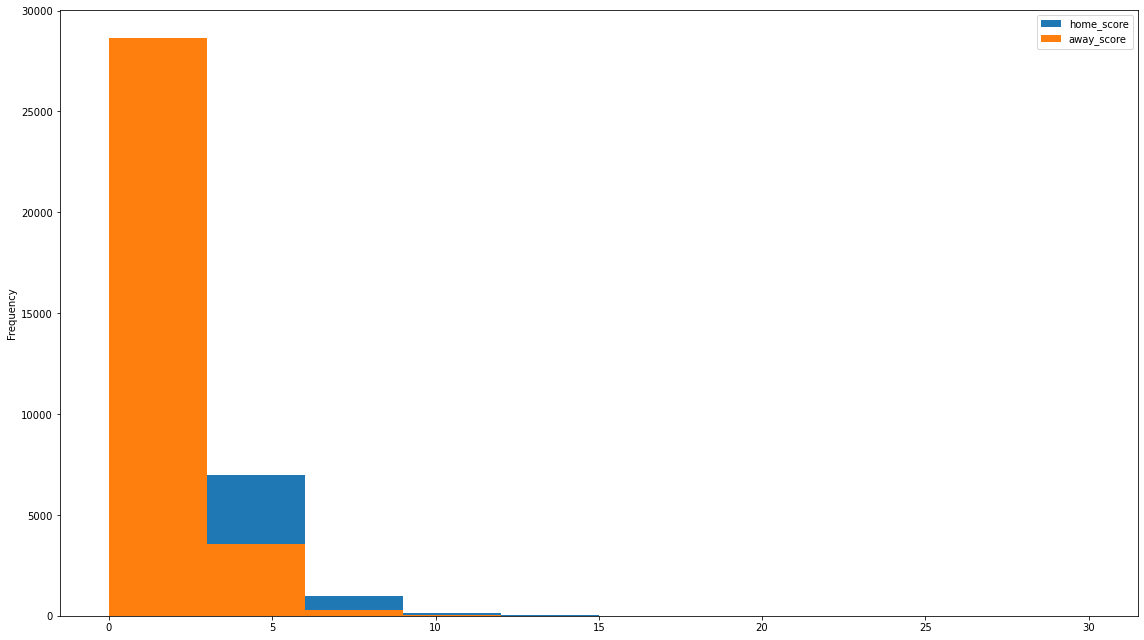

In [126]:
df.plot(kind = 'hist')
print("DataFrame datos")

<AxesSubplot:>

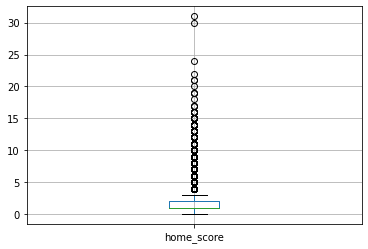

In [40]:
# ¿Hay valores atípicos en los datos de la puntuación local?
df.boxplot(column=['home_score'])

In [41]:
#Comprobación de los valores extremos de los datos de la puntuación local.
print(df['home_score'].min())
print(df['home_score'].max())

0
31


In [42]:
#viendo el extremo
df[df['home_score'] > 25]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
8009,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
23965,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


In [35]:
#correlacion de las variables
df.corr()

,home_score,away_score,neutral
home_score,1.000000,-0.137940,-0.033902
away_score,-0.137940,1.000000,0.084688
neutral,-0.033902,0.084688,1.000000


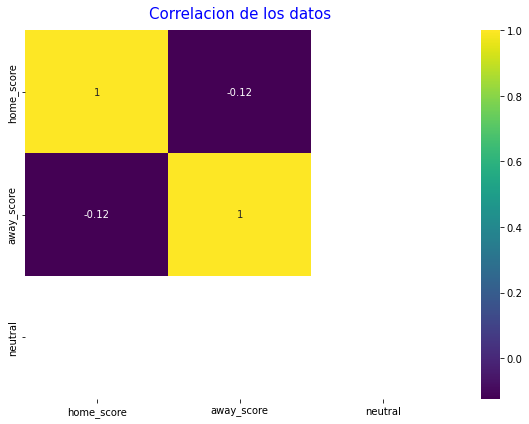

In [118]:
#Visualiación de la correlación de los datos
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title('Correlacion de los datos', fontsize = 15, pad = 12, color = 'b')
plt.show()

<AxesSubplot:>

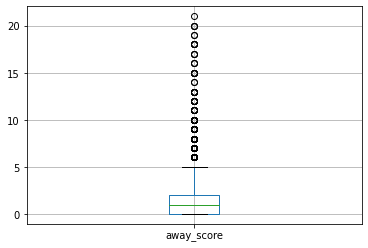

In [43]:
# ¿Hay valores atípicos en los datos de puntuación de visitante?
df.boxplot(column=['away_score'])

In [46]:
#Comprobación de los valores extremos de los datos de puntuación de visitante
print(df['away_score'].min())
print(df['away_score'].max())

0
21


In [47]:
df[df['away_score'] > 20]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
27542,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


# Análisis

In [52]:
#Eliminación de partidos jugados en un lugar neutral
df = df.drop(df[df['neutral'] == True].index)

In [54]:
#Verificando que se eliminen las sedes neutrales
df[df['neutral'] == True]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [58]:
#Selección de equipos que han jugado tanto en casa como fuera
#Agregando la columna de victorias en casa y victorias fuera de casa
x=0
while x < 2:
    df = df[df.away_team.isin(df['home_team'].unique())]
    df = df[df.home_team.isin(df['away_team'].unique())]
    x+=1
df['home_win'] = np.where((df['home_score'] > df['away_score']), 'Si', 'No')
df['away_win'] = np.where((df['home_score'] < df['away_score']), 'Si', 'No')
df    

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,No,No
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Si,No
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Si,No
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,No,No
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Si,No
...,...,...,...,...,...,...,...,...,...,...,...
43444,2022-05-27,Thailand,Turkmenistan,1,0,Friendly,Sisaket,Thailand,False,Si,No
43445,2022-05-28,Ethiopia,Lesotho,1,1,Friendly,Adama,Ethiopia,False,No,No
43448,2022-05-29,United Arab Emirates,Gambia,1,1,Friendly,Dubai,United Arab Emirates,False,No,No
43449,2022-05-30,Ethiopia,Lesotho,1,1,Friendly,Adama,Ethiopia,False,No,No


In [59]:
#Cuántas veces ganó el equipo local y viceversa.
df['away_win'].value_counts()

No    23958
Si     8574
Name: away_win, dtype: int64

In [61]:
#Comprobando para ver el número de equipos locales
df['home_team'].nunique() 

254

In [62]:
##omprobando para ver el número de equipos visitantes
df['away_team'].nunique() 

254

In [63]:
#Verificando que los equipos incluidos en el análisis jugaron tanto en casa como fuera.
df[~df.away_team.isin(df['home_team'].unique())]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win


# Análisis de victorias en casa.

In [64]:
#agrupación por equipo local y luego por victoria local
gb_home = df.groupby(['home_team','home_win'])

In [66]:
#Ver los datos de Alemania para su verificación.
gb_home.get_group(('Germany','Si'))

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
238,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,Si,No
286,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,Si,No
567,1920-10-24,Germany,Hungary,1,0,Friendly,Berlin,Germany,False,Si,No
764,1923-11-04,Germany,Norway,1,0,Friendly,Hamburg,Germany,False,Si,No
781,1924-01-13,Germany,Austria,4,3,Friendly,Nuremberg,Germany,False,Si,No
...,...,...,...,...,...,...,...,...,...,...,...
42498,2021-06-19,Germany,Portugal,4,2,UEFA Euro,Munich,Germany,False,Si,No
42726,2021-09-05,Germany,Armenia,6,0,FIFA World Cup qualification,Stuttgart,Germany,False,Si,No
42847,2021-10-08,Germany,Romania,2,1,FIFA World Cup qualification,Hamburg,Germany,False,Si,No
42992,2021-11-11,Germany,Liechtenstein,9,0,FIFA World Cup qualification,Wolfsburg,Germany,False,Si,No


In [112]:
#contando si el equipo de casa ganó el partido o no
hwin = gb_home.home_win.count()

#convirtiendo la serie en un marco de datos para su posterior análisis.
hwin = pd.DataFrame(hwin)

hwin.rename(columns = {'home_win':'count'},inplace=True)

hwin = hwin.reset_index()

hwin = hwin.pivot(index = 'home_win',columns='home_team').fillna(0)

hwin.loc['home_win%'] = hwin.apply(lambda x: (x["Si"] / (x["Si"]+x["No"])*100))

In [113]:
def analysis(new):
   #convirtiendo la columna de múltiples índices en un solo índice

    new.columns = new.columns.droplevel(0)

   
    new = new.transpose()

  #Creando una nueva columna de total de juegos jugados
    new['Total'] = new['No'] + new['Si']

    #creando un nuevo dataframe con equipos que han jugado al menos 300 juegos para significación estadística
    new_filtered = new[new['Total'] >= 300]

    #resetting index para que el equipo se convierta en una columna
    new_filtered = new_filtered.reset_index()
    
    return new_filtered


In [114]:
#Para obtener el dataframe
homewinperc = analysis(hwin)
homewinperc

home_win,home_team,No,Si,home_win%,Total
0,Argentina,116.0,227.0,66.180758,343.0
1,Austria,196.0,209.0,51.604938,405.0
2,Belgium,176.0,206.0,53.926702,382.0
3,Brazil,94.0,261.0,73.521127,355.0
4,Denmark,167.0,218.0,56.623377,385.0
5,England,164.0,302.0,64.806867,466.0
6,Finland,213.0,103.0,32.594937,316.0
7,France,183.0,261.0,58.783784,444.0
8,Germany,159.0,271.0,63.023256,430.0
9,Hungary,190.0,248.0,56.621005,438.0


# Análisis de victorias fuera de casa

In [92]:
#grouping by away team and then by away win
gb_away = df.groupby(['away_team','away_win'])

#Viewing the data for Germany for verification
gb_away.get_group(('Germany','No'))

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
213,1908-04-05,Switzerland,Germany,5,3,Friendly,Basel,Switzerland,False,Si,No
220,1908-06-07,Austria,Germany,3,2,Friendly,Vienna,Austria,False,Si,No
239,1909-04-04,Hungary,Germany,3,3,Friendly,Budapest,Hungary,False,No,No
261,1910-04-24,Netherlands,Germany,4,2,Friendly,Arnhem,Netherlands,False,Si,No
290,1911-04-23,Belgium,Germany,2,1,Friendly,Liège,Belgium,False,Si,No
...,...,...,...,...,...,...,...,...,...,...,...
40386,2018-10-16,France,Germany,2,1,UEFA Nations League,Paris,France,False,Si,No
41799,2020-09-06,Switzerland,Germany,1,1,UEFA Nations League,Basel,Switzerland,False,No,No
42026,2020-11-17,Spain,Germany,6,0,UEFA Nations League,Seville,Spain,False,Si,No
42536,2021-06-29,England,Germany,2,0,UEFA Euro,London,England,False,Si,No


In [95]:
#contando si el equipo de visita ganó el partido o no

awin = gb_away.away_win.count()

#convirtiendo la serie en un marco de datos para su posterior análisis.
awin = pd.DataFrame(awin)

#Renombrando la columna.
awin.rename(columns = {'away_win':'count'},inplace=True)


#Restableciendo los índices para obtener las columnas requeridas
awin = awin.reset_index()

#creando una tabla dinámica para facilitar el cálculo
awin = awin.pivot(index = 'away_win',columns='away_team').fillna(0)

#Creando una nueva fila para el porcentaje de victorias

awin.loc['away_win%'] = awin.apply(lambda x: (x["Si"] / (x["Si"]+x["No"])*100))
#To obtain the desired dataframe
awaywinperc = analysis(awin)
awaywinperc

away_win,away_team,No,Si,away_win%,Total
0,Argentina,240.0,151.0,38.618926,391.0
1,Austria,248.0,115.0,31.680441,363.0
2,Belgium,228.0,112.0,32.941176,340.0
3,Brazil,159.0,168.0,51.376147,327.0
4,Bulgaria,262.0,95.0,26.610644,357.0
5,Denmark,240.0,131.0,35.309973,371.0
6,England,214.0,250.0,53.879310,464.0
7,Finland,325.0,79.0,19.554455,404.0
8,France,198.0,125.0,38.699690,323.0
9,Germany,179.0,215.0,54.568528,394.0


In [107]:
# Unión de los dataframe de porcentaje de victorias de local y visitante.

final = pd.merge(homewinperc,awaywinperc,left_on='home_team',right_on='away_team')

final = final.drop(['No_x','Si_x','Total_x','away_team','No_y','Si_y','Total_y'],axis=1).rename(columns={'home_team':'Team'})

final = final.sort_values('home_win%',ascending=False)


final

,Team,home_win%,away_win%
3,Brazil,73.521127,51.376147
10,Italy,66.579634,40.983607
0,Argentina,66.180758,38.618926
5,England,64.806867,53.879310
8,Germany,63.023256,54.568528
16,Sweden,60.173160,41.014799
18,Uruguay,59.271523,27.792208
7,France,58.783784,38.699690
11,Netherlands,58.593750,41.666667
15,Scotland,57.559682,39.740260


In [100]:
#Generar estadísticas descriptivas
final[['home_win%','away_win%']].describe()

,home_win%,away_win%
count,20.000000,20.000000
mean,54.478735,35.980730
std,11.171523,10.092222
min,32.594937,18.380062
25%,49.295659,30.708383
50%,57.091529,36.432279
75%,60.885684,40.991405
max,73.521127,54.568528


In [106]:
#Equipos con mayor ventaja de local
final['significante'] = final['home_win%']/final['away_win%']
final2 = final.sort_values('significance',ascending=False)
final2.head(5)

,Team,home_win%,away_win%,significance,significante
18,Uruguay,59.271523,27.792208,2.132667,2.132667
12,Northern Ireland,33.870968,18.380062,1.842810,1.842810
17,Switzerland,44.723618,25.205479,1.774361,1.774361
0,Argentina,66.180758,38.618926,1.713687,1.713687
6,Finland,32.594937,19.554455,1.666880,1.666880


In [105]:
#Equipos con una ventaja de local menos significativa
final2.tail(5)

,Team,home_win%,away_win%,significance,significante
3,Brazil,73.521127,51.376147,1.431036,1.431036
11,Netherlands,58.593750,41.666667,1.406250,1.406250
13,Norway,41.666667,32.124352,1.297043,1.297043
5,England,64.806867,53.879310,1.202815,1.202815
8,Germany,63.023256,54.568528,1.154938,1.154938


# Visualización de datos del porcentaje de victorias en casa y fuera de casa de los equipos.

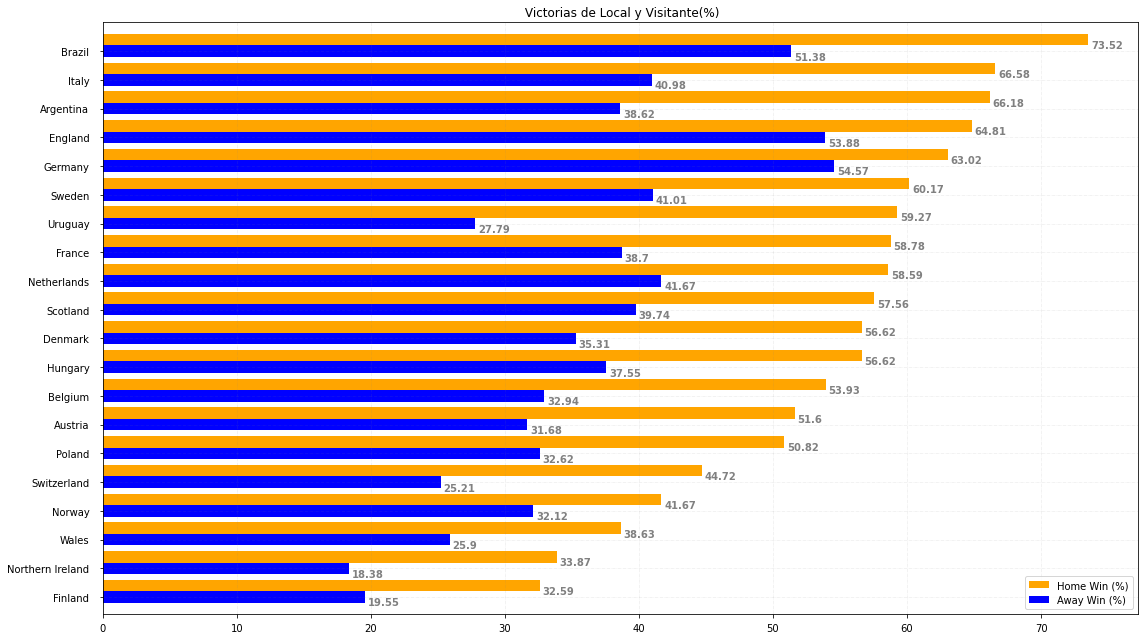

In [117]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["figure.autolayout"] = True

ind = np.arange(len(final.Team))

width = .4
fig, ax = plt.subplots()

ax.barh(ind, final['home_win%'], width, color='orange', label='Home Win (%)')
ax.barh(ind + width, final['away_win%'], width, color='blue', label='Away Win (%)')

ax.set(yticks=ind + width, yticklabels=final.Team,
ylim=[width - 1, len(ind)])

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.5,alpha = 0.2)


ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

ax.legend()

ax.set_title(' Victorias de Local y Visitante(%)' )

plt.show()

# Conclusión.

En conclusión podemos ver que existe una ventaja al jugar de local para todos los equipos considerados en el análisis ya que su porcentaje de victorias en condición de local es mayor que su porcentaje de victorias en condición de visitante. 
Y se aprecia qque equipos como Uruguay, Irlanda del Norte y Suiza tienen una ventaja de local mucho más significativa, mientras que en el caso de equipos como Inglaterra, Noruega y Alemania la ventaja de local  es menos significativa.